# Synthetic APWP generation with EulerRots

In [1]:
%matplotlib inline
import EulerRots as rotkit
# in order to work correctly, you need to have compiled the fortran routines Rotkit_f for your machine
import os
import pandas as pd
import numpy as np

#only needed for the plots
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

EulerRots.py:17: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  platecodes=pd.read_table(os.path.join(__location__,'Datafiles/PlateCodes.txt'), header=None, names=['NumCode','LetterCode','Description'],index_col='NumCode')


I have been recoding my plate rotation codes into an object-oriented framework. A set of rotations in a tab-delimited text file, with a header row as in the ones loaded here, is loaded into a EulerRotationModel object. In this case, I have two different rotation models with different hotspot reference frames (the fixed and moving models of O'Neill et al. 2005)

In [4]:
rotmodel=rotkit.EulerRotationModel('./Datafiles/NUB_NAM_MANTfixed_rots.txt')
rotmodel2=rotkit.EulerRotationModel('./Datafiles/NUB_NAM_MANTmoving_rots.txt')

You can check to see which rotations are in this file with the .summary() command. 

In [5]:
rotmodel.summary()

,MovingPlate,MovingPlateName,FixedPlate,FixedPlateName,N,Youngest,Oldest
0,701,African Craton,1,Indo-Atlantic Hotspots (Present Day),12,0.0,120.0
1,101,North American Craton,701,African Craton,17,0.0,130.5
2,301,Northern European Craton and Eurasia,101,North American Craton,32,0.0,120.0


Each EulerRotationModel is a collection of FiniteRotationSets, which are themselves a collection of EulerRotations:

In [6]:
rotmodel.rotationsets

In [7]:
rotmodel.rotationsets[0].summary()

,MovingPlate,FixedPlate,StartAge,EndAge,RotLat,RotLong,RotAng
0,701,1,0,0.0,57.73,-51.26,0.00
1,701,1,0,10.0,57.73,-51.26,-1.36
2,701,1,0,30.0,49.42,-61.90,-5.80
3,701,1,0,40.0,44.56,-55.74,-7.42
4,701,1,0,50.0,8.84,-34.84,-12.43
5,701,1,0,60.0,14.24,-40.32,-13.73
6,701,1,0,70.0,26.52,-47.46,-14.60
7,701,1,0,80.0,26.85,-46.92,-17.71
8,701,1,0,90.0,7.24,-33.73,-22.75
9,701,1,0,100.0,10.83,-46.48,-26.59


In [8]:
rotmodel.rotationsets[0].rotations

In [9]:
rotmodel.rotationsets[0].rotations[4].details()

MovingPlate                   701
FixedPlate                      1
Timescale               Undefined
StartChron                   None
EndChron                     None
StartAge                        0
EndAge                         50
RotLat                       8.84
RotLong                    -34.84
RotAng                     -12.43
Kappahat                     0.83
a                        0.000678
b                        3.61e-05
c                       -0.000359
d                        0.000157
e                       -0.000106
f                        0.000345
Points                         36
Segs                           10
Plates                          2
DOF                            13
Source         O'Neill et al 2005
dtype: object

In [10]:
rotmodel.rotationsets[0].rotations[4].Covariances

Kappahat    0.830000
a           0.000678
b           0.000036
c          -0.000359
d           0.000157
e          -0.000106
f           0.000345
dtype: float64

In addition to simple operations (add, interpolate, invert etc.) there are more complex functions which do the hard work of generating useful products. For the present, the most useful for you are probably get_rots and synthetic_APWP: 

In [11]:
ages=np.arange(10,121,10).tolist()
result=rotmodel.get_rots(101,1,ages)
result.summary()

,MovingPlate,FixedPlate,StartAge,EndAge,RotLat,RotLong,RotAng
0,101,1,0.0,0.0,61.946901,95.539718,0.000000
1,101,1,0.0,10.0,61.946901,95.539718,1.555795
2,101,1,0.0,20.0,48.071718,94.780985,3.524997
3,101,1,0.0,30.0,45.983871,85.085066,5.464042
4,101,1,0.0,40.0,56.215425,79.185457,8.132674
5,101,1,0.0,50.0,54.712241,122.754552,16.623522
6,101,1,0.0,60.0,52.043323,119.435341,19.321183
7,101,1,0.0,70.0,53.338870,109.195748,18.878532
8,101,1,0.0,80.0,57.153072,102.979130,21.927417
9,101,1,0.0,90.0,62.330254,112.799489,32.520044


In [13]:
path=rotmodel.synthetic_APWP(101,1,ages)
path

,Name,PlateCode,FeatureAge,ReconstructionAge,Lat,Lon,MaxError,MinError,MaxBearing
0,VGP-10,101,10,0.0,89.268314,184.852837,1.418923,0.634979,134.612781
1,VGP-20,101,20,0.0,87.644819,183.469586,1.144062,0.812619,130.912919
2,VGP-30,101,30,0.0,86.203977,173.119608,1.627898,0.905915,-37.130194
3,VGP-40,101,40,0.0,85.480298,165.804033,4.899604,2.659581,96.130188
4,VGP-50,101,50,0.0,80.419374,205.954123,4.636772,3.103028,-42.534259
5,VGP-60,101,60,0.0,78.151334,201.790895,4.247151,2.847851,115.016532
6,VGP-70,101,70,0.0,78.760895,191.599317,5.687727,3.448543,110.318890
7,VGP-80,101,80,0.0,78.158042,183.735224,6.565030,3.369459,104.323297
8,VGP-90,101,90,0.0,75.058106,188.316089,4.817962,3.180180,124.151250
9,VGP-100,101,100,0.0,71.395711,160.118789,2.458671,2.086345,23.412480


Just to show what this looks like, a quick comparison of the synthetic APWPs for the moving and fixed hotspot reference frame:

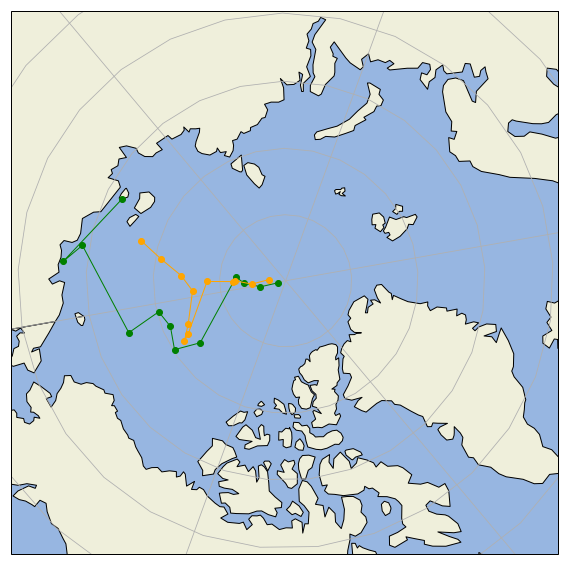

In [16]:
path2=rotmodel2.synthetic_APWP(101,1,ages)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(-100))
ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

plt.plot(path.Lon, path.Lat, 'o-',
         color='green', linewidth=1,
         transform=ccrs.Geodetic())

plt.plot(path2.Lon, path2.Lat, 'o-',
         color='orange', linewidth=1,
         transform=ccrs.Geodetic())